In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

filename1 = 'cs_mnd_data_idx_wbo_3metals_monoP.csv' # mnp published 
filename2 = 'ligand_monoP_input_idx_3metals.csv' #  mnp calculated 
filename3 = 'cs_mnd_data_idx_wbo_3metals.csv' # NHC published
filename4 = 'ligand_NHC_input_idx_wbo_3metals.csv' # NHC Calculated
df1 = pd.read_csv(filename1)
df1['source'] = 'mono-phosphine(P)'
df2 = pd.read_csv(filename2)
df2['source'] = 'mono-phosphine(C)'
df3 = pd.read_csv(filename3)
df3['source'] = 'NHC(P)'
df4 = pd.read_csv(filename4)
df4['source'] = 'NHC(C)'
df_all = pd.concat([df1,df2,df3,df4])
df_all

,Filename,CSD Code,MND Number,charge,spin,idx_monoP_P,idx_metal,wbo_metal_total,wbo_metal-ligand,metal,source,ID,SMILES,3D_conversion_flag,idx_monoP_C,idx_NHC_C,note
0,Cu_in_X2_29478.xyz,VALDUH,2.0,0.0,0.0,2.0,0,1.542,0.565,Cu,mono-phosphine(P),NaN,NaN,NaN,NaN,NaN,NaN
1,Cu_in_X2_30115.xyz,TANMEC,4.0,1.0,0.0,1.0,0,1.792,0.687,Cu,mono-phosphine(P),NaN,NaN,NaN,NaN,NaN,NaN
2,Cu_in_X2_34401.xyz,HIGJIS,4.0,0.0,0.0,68.0,62,1.660,0.623,Cu,mono-phosphine(P),NaN,NaN,NaN,NaN,NaN,NaN
3,Cu_in_X2_35253.xyz,AWEMAQ,4.0,0.0,0.0,56.0,55,2.540,0.445,Cu,mono-phosphine(P),NaN,NaN,NaN,NaN,NaN,NaN
4,Cu_in_X2_31035.xyz,IBIHOS,3.0,0.0,0.0,1.0,0,2.056,0.410,Cu,mono-phosphine(P),NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,NaN,NaN,NaN,NaN,89,3.794,0.742,Pd,NHC(C),NHC15,CC(C1=CC(C(C)(C)C)=CC([N+]2=CN(C3=CC(C(C)(C)C)...,3.0,NaN,12.0,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,128,3.848,0.736,Pd,NHC(C),NHC16,COC1=CC(C(C2=CC=CC=C2)C3=CC=CC=C3)=C(N4[C]N(C5...,3.0,NaN,25.0,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,28,3.831,0.803,Pd,NHC(C),139143-11-6,CC1=CC=C(C=C1)N2C=C[N+](=C2)C3=CC=C(C=C3)C.[Cl-],3.0,NaN,11.0,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,58,3.827,0.747,Pd,NHC(C),866926-59-2,CC1=CC(=C(C(=C1)C)[N+]2=CN(CC2)C3=C(C=CC=C3C(C...,3.0,NaN,9.0,NaN


In [9]:

def add_outlier_boxplot(data, x, y, ax, color_map=None):
    categories = data[x].unique()
    
    for i, cat in enumerate(categories):
        subset = data[data[x] == cat][y]
        
        if len(subset) < 3:
            print(f"Skipping category {cat} due to insufficient data.")
            continue

        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        
        IQR = Q3 - Q1

        # Calculate potential outliers based on IQR
        outliers = subset[(subset < Q1 - 1.5 * IQR) | (subset > Q3 + 1.5 * IQR)]

        # Use entire subset range if no outliers exist
        oQ1 = Q1 if outliers.empty else outliers.quantile(0.01)
        oQ3 = Q3 if outliers.empty else outliers.quantile(0.99)

        omin = subset.min() if outliers.empty else outliers.min()
        omax = subset.max() if outliers.empty else outliers.max()

        x_center = i
        box_width = 0.4
        z = 10

        # Get color from color_map or use default
        facecolor = color_map.get(cat, 'gray') if color_map else 'gray'

        # Create the colored rectangle
        rect = Rectangle(
            (x_center - box_width / 2, oQ1),
            box_width,
            oQ3 - oQ1,
            edgecolor='grey',
            facecolor='None',
#             alpha=0.4,
            zorder=z,
            linewidth=1.5,
        )
        
        ax.add_patch(rect)

        margin_ratio = 0.1
        outlier_range = omax - omin if omax > omin else 1
        pad = outlier_range * margin_ratio

        whisker_min = omin - pad
        whisker_max = omax + pad

        ax.vlines(x=x_center, ymin=whisker_min, ymax=oQ1, colors='grey', linewidth=1.5, zorder=z)
        ax.vlines(x=x_center, ymin=oQ3, ymax=whisker_max, colors='grey', linewidth=1.5, zorder=z)
        
        cap_width = box_width * 0.2  # Adjust as needed
        ax.plot([x_center - cap_width / 2, x_center + cap_width / 2], [whisker_min, whisker_min], color='grey', zorder=z)
        ax.plot([x_center - cap_width / 2, x_center + cap_width / 2], [whisker_max, whisker_max], color='grey', zorder=z)

        # Calculate the mean of the subset
        mean_val = subset.mean()
        
        # Draw the mean line
        ax.hlines(y=mean_val, xmin=x_center - box_width / 2, xmax=x_center + box_width / 2, 
                  colors='grey', linestyle='-', linewidth=1.5, zorder=z+1)
def convert_to_unicode_subscript(text):
#     Mapping for available subscript unicode characters
    subscript_mapping = {
        "0": "₀", "1": "₁", "2": "₂", "3": "₃", "4": "₄",
        "5": "₅", "6": "₆", "7": "₇", "8": "₈", "9": "₉",
        "a": "ₐ", "e": "ₑ", "o": "ₒ", "x": "ₓ", "h": "ₕ",
        "k": "ₖ", "l": "ₗ", "m": "ₘ", "n": "ₙ", "p": "ₚ",
        "s": "ₛ", "t": "ₜ", "u": "ᵤ", "v": "ᵥ"
        # Extend as needed
    }

    # Convert numerals and specific characters to subscripts
    subscript_text = ''.join(subscript_mapping.get(char, char) for char in text)
    return subscript_text


def convert_to_matplotlib_subscript(text):
    # In Matplotlib, subscripts are created using the LaTeX syntax
    # Split text by detecting numbers or non-alpha characters
    result = []
    for i, char in enumerate(text):
        if i > 0 and char.isdigit() and not text[i-1].isdigit():
            result.append('$_')
        result.append(char)
        if i > 0 and char.isdigit() and (i+1 == len(text) or not text[i+1].isdigit()):
            result.append('$')

    # Combine the list into a string and return
    return ''.join(result)


d = {
        '3':'7',
        '4':'8'
    }


info = {}
info['x_label'] = "Metal type"
info['y_label'] = f"Wiberg Bond Order"

dif = 'Cu and Ni and Pd and Blank with base'
f_path = f"Boxplot of final"
info['f_path'] = f_path
info['f_path'] = f_path


/var/folders/hp/ltxd472947ndx3kypb8scq3w0000gr/T/ipykernel_15169/2988840380.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
/var/folders/hp/ltxd472947ndx3kypb8scq3w0000gr/T/ipykernel_15169/2988840380.py:112: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
/var/folders/hp/ltxd472947ndx3kypb8scq3w0000gr/T/ipykernel_15169/2988840380.py:112: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
/var/folders/hp/ltxd472947ndx3kypb8scq3w0000gr/T/ipykernel_15169/2988840380.py:112: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ti

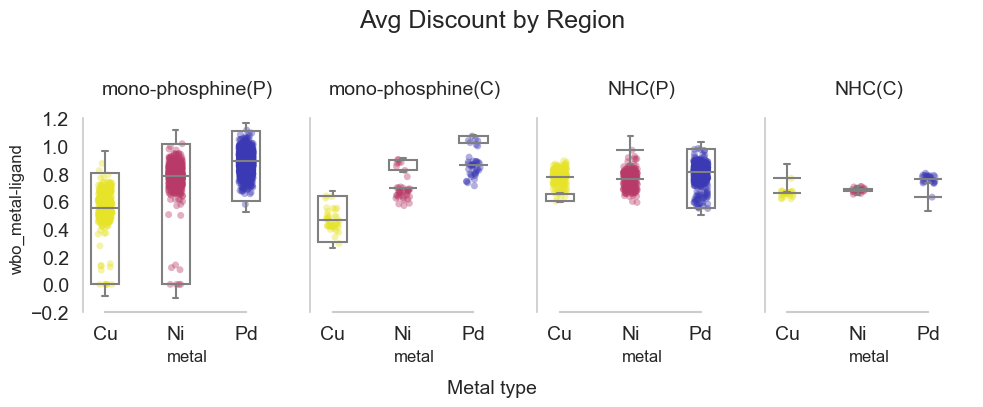

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.patches import Rectangle
sns.set(style="whitegrid", context="notebook")  # You can try "paper" for a smaller scale
plt.rcParams.update({'font.size': 14, 'font.family': 'Arial'})  # Set font to Arial


# Define column name variables
Segment = 'source' 
Region = 'metal'
Discount = 'wbo_metal-ligand'


region_colors = {
    "Cu": "#E6E328",
    "Pd": "#3B39B3",
    "Ni": "#B83A68",
    'Blank':'#808080',
 }
figure = {}
figure['x'] = 12
figure['y'] = 6

sns.set(style="whitegrid", context="notebook")  # You can try "paper" for a smaller scale

f_op = ['strip', 'swarm', 'box', 'boxen', 'violin', 'bar', 'count',  'point']

# Create the plot
g = sns.catplot(
    data=df_all,
    x=Region,
    y=Discount,
    col=Segment,
    kind=f_op[0], #'boxplot',
    jitter=True,
#     dodge=True,
#     height=5,
    alpha=0.4,
    aspect=1.5,
    palette=region_colors,
#     sharex=True,  # Share the x-axis across facets to align
#     sharey=True   # Share the y-axis across facets, show only on the first
)

# Customize grid lines and aesthetics
for i, ax in enumerate(g.axes.flat):
#     ax.xaxis.grid(True, linestyle='-', color='grey', alpha=0.7, linewidth=1.5)
#     ax.yaxis.grid(True, linestyle='-', color='grey', alpha=0.7, linewidth=1.5)

#     ax.set_axisbelow(True)
    
# #     # Rotate x-tick labels
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
#     # Add a line across the bottom between ticks
#     xtick_positions = range(len(df[Region].unique()))
#     ax.plot([-0.5, len(xtick_positions) - 0.5], [-0.02, -0.02], color='grey', linestyle='-', linewidth=1.5)
    
#     # Only keep the y-axis line on the first plot
# #     if i != 0:
#     ax.spines['left'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)

# set font size
    ax.tick_params(axis='y', labelsize=14)  # Set y tick label fontsize
    ax.tick_params(axis='x', labelsize=14)  # Set x tick label fontsize
#     ax.set_title(ax.get_title(), fontsize=14)
    
    pass
#         ax.set_yticklabels([])


ordered_labels = g.col_names
# Iterate through each axes object and set the title properties
for ax, col_value in zip(g.axes.flat, ordered_labels):
    ax.set_title(convert_to_matplotlib_subscript(col_value), fontsize=14)  # Set font size for each column label

    
d = {
        '3':'7',
        '4':'8'
    }


# Set a common x-axis label for the entire grid
# g.set_axis_labels("", f"Actual Treatment Effect for $\\bf{{{prod_col}}}$, $\\bf{{{d[prod_col]}}}$",  fontsize=14)
g.fig.text(0.5, 0.02, info['x_label'], ha='center', fontsize=14)

# Remove "Segment =" prefix from facet titles
for ax in g.axes.flat:
    title = ax.get_title()
    if '=' in title:
        clean_title = title.split('=')[1].strip()
        ax.set_title(clean_title)

for ax, (_, subdata) in zip(g.axes.flat, g.facet_data()):
    add_outlier_boxplot(subdata, x=Region, y=Discount, ax=ax, color_map= region_colors)

    

for i, ax in enumerate(g.axes.flat):
#     ax.xaxis.grid(True, linestyle='-', color='grey', alpha=0.7, linewidth=1.5)
    # Disable y-axis grid if you don't want horizontal lines
#     print(len(g.axes.flat))
#     ax.yaxis.grid(True, linestyle='--', linewidth=0.75, alpha=0.7)
    ax.yaxis.grid(False)
#     ax.set_axisbelow(True)
    
    # Rotate x-tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Remove custom horizontal line
    # xtick_positions = range(len(df[Region].unique()))
    # ax.plot([-0.5, len(xtick_positions) - 0.5], [-0.02, -0.02], color='grey', linestyle='-', linewidth=1.5)

    # Only keep the y-axis line on the first plot
    if i==0:
        ax.spines['left'].set_visible(True)  # Only visible for the first plot
    else:
        ax.spines['left'].set_visible(False)  # Only visible for the first plot
        ax.tick_params(axis='y', 
               which='both', 
               left=False,         # Keep left ticks visible (default)
               right=False)  
        
    ax.spines['bottom'].set_visible(True)
    
    ax.spines['bottom'].set_linewidth(1.5)  # Set this to your desired width
    plt.tick_params(axis='x', which='both', bottom=False, top=False)

    
for ax in g.axes.flat:
    xlim = ax.get_xlim()
    # Increase the limits by 10% on each side
    ax.set_xlim(xlim[0] - 0.0 * (xlim[1] - xlim[0]), xlim[1] + 0.03 * (xlim[1] - xlim[0]))

    
    
lower_limit = df_all[Discount].min()-0.2  # Adjust as necessary
upper_limit = df_all[Discount].max()+0.2
# lower_limit = 0
# upper_limit=1.2
g.set(ylim=(lower_limit, upper_limit))
    
# Improve layout
# g.fig.subplots_adjust(top=0.85, bottom=0.15, wspace=20)
g.fig.subplots_adjust(wspace=0.3)
g.fig.suptitle("Avg Discount by Region", fontsize=18)
g.fig.set_size_inches(10, 4)
sns.despine(trim=True)
plt.tight_layout(rect=[0, 0.048, 1, 0.95])

info['f_path'] = f"wbo final figure"
# plt.savefig(f"final_edition/{info['f_path']}_7_final_final2.svg", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
group_col = 'metal'
p_col = 'wbo_metal-ligand'#f'{prod_col}_mean_difference'

info = {}
info['x_label'] = f"source"
info['y_label'] = "Energy (kcal/mol)"

f_path = f"./code_with_more_space_without_line5_final2"
info['f_path'] = f_path

result = df_all.copy()
result['metal_found'] = result['source']
info['f_path'] = f_path
# plot_boxplot(result, group_col, p_col ,saved=False, info=info, figure={'x':10, 'y':4})

/var/folders/hp/ltxd472947ndx3kypb8scq3w0000gr/T/ipykernel_16555/2712730347.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='metal', y='wbo_metal-ligand', data=dfs[index], palette=metal_colors, order=metal_order,
/Users/mohabdel/anaconda3/envs/r_opt/lib/python3.10/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/Users/mohabdel/anaconda3/envs/r_opt/lib/python3.10/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/Users/mohabdel/anaconda3/envs/r_opt/lib/python3.10/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor p

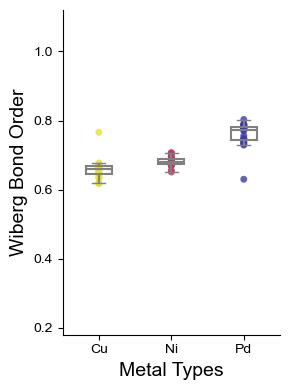

In [25]:

metal_colors = {
    "Cu": "#E6E328",
    "Pd": "#3B39B3",
    "Ni": "#B83A68",
    'Blank':'#808080',
 }

plt.figure(figsize=(3,4))
plt.rcParams['font.family'] = 'Arial'
plasma_colors = plt.cm.plasma
metal_order = ['Cu', 'Ni', 'Pd']
# metal_colors = {
#           "Pd": plasma_colors(0.9)[:3],
#           "Ni": plasma_colors(0.5)[:3],
#           "Cu": plasma_colors(0.1)[:3],
#           }


file_name_list = ['mono_phosphine_published', 'mono_phosphine_calculated','NHC_published','NHC_calculated']

dfs = [df1, df2, df3, df4]
index=3
ax = sns.boxplot(x='metal', y='wbo_metal-ligand', data=dfs[index], palette=metal_colors, order=metal_order,
                 showfliers=False, fill=True, width=0.4, showcaps=True, zorder=2,
                boxprops={'facecolor':'grey', 'color':'grey', 'linewidth': 1.5,
                                 },  # Thinner box edges
                        whiskerprops={'linewidth': 1.5, 'color':'grey'},  # Thinner whiskers
                        medianprops={'linewidth': 1.5, 'color':'grey'},  # Thinner median line
                      capprops=dict(color='grey'),
                          gap=0.1,
                ) #palette=metal_colors, boxprops=dict(alpha=.5), linewidth=0.5
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))

sns.stripplot(x='metal', y='wbo_metal-ligand', data=dfs[index], palette=metal_colors, order=metal_order, jitter=False,alpha=0.8,  zorder=1) #alpha=0.2 #metal_types, #palette=metal_colors
plt.ylabel('Wiberg Bond Order', fontsize=14)
#plt.ylim((0.18, 1.92))
plt.ylim((0.18, 1.12)) #range for monophosphine, nhc
plt.xlabel('Metal Types', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('figure_'+file_name_list[index] +'.svg', dpi=300)
plt.show()
#exit()
